<a href="https://colab.research.google.com/github/haleywis/OPTI556/blob/main/HW3_Wiskoski_Part1and2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OPTI-556: Computational Imaging**  
# Haley Wiskoski  
Homework #3 - Rays 
Part 1 & 2: MURA Coded Aperture Imaging and Neural Denoising 
Due: Tuesday October 12, 2021


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import signal
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
import cv2
from PIL import Image
from keras.datasets import mnist
from progressbar import ProgressBar

## 1) MURA Coded Aperture Imaging

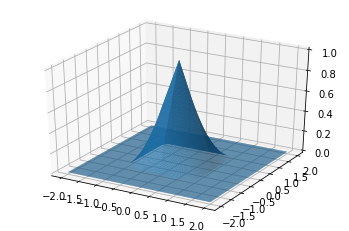

In [2]:
# Creatining the coded aperture sampling function
pixel = np.zeros((128,128))
pixel[(64-32):(64+32),(64-32):(64+32)] = 1
sampFun = signal.convolve2d(pixel,pixel)
sampFun = sampFun/np.max(sampFun)

fig=plt.figure()
ax = plt.gca(projection='3d')
X, Y = np.meshgrid(np.linspace(-2,2,255), np.linspace(-2,2,255))
surf = ax.plot_surface(X, Y, sampFun, rstride=1, cstride=1, antialiased=True, linewidth=0)

In [3]:
# Quadratic Residues Function
def qres(p):
  # function to find the quadratic residues modulo prime number p between 1
  # and p-1. The function returns a list with value 1 for all indices which
  # are quadratic residues modulo p and value 0 for indices which are not
  # quadratic residues.
  qr=np.zeros(p)
  for i in range(1,p):
    qr[np.mod(i**2,p)-1]=1
  return qr

Text(0.5, 0.92, 'Cross Corelation with Decoding Pattern')

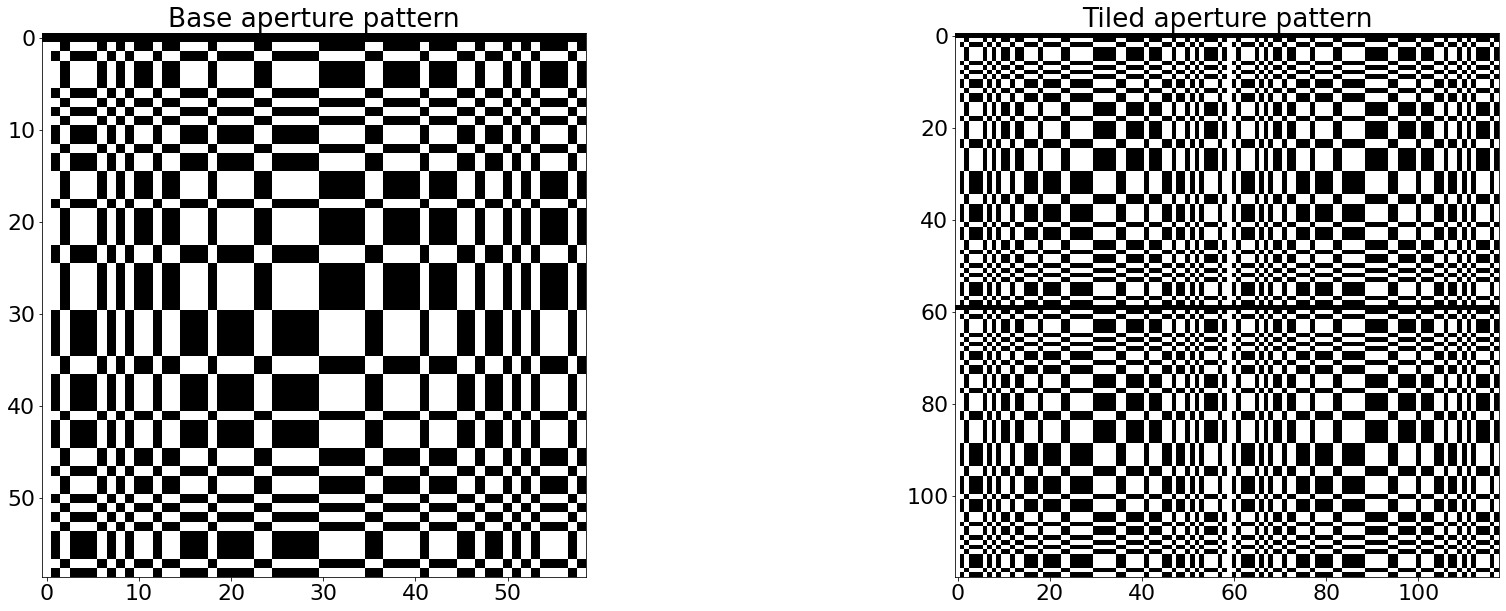

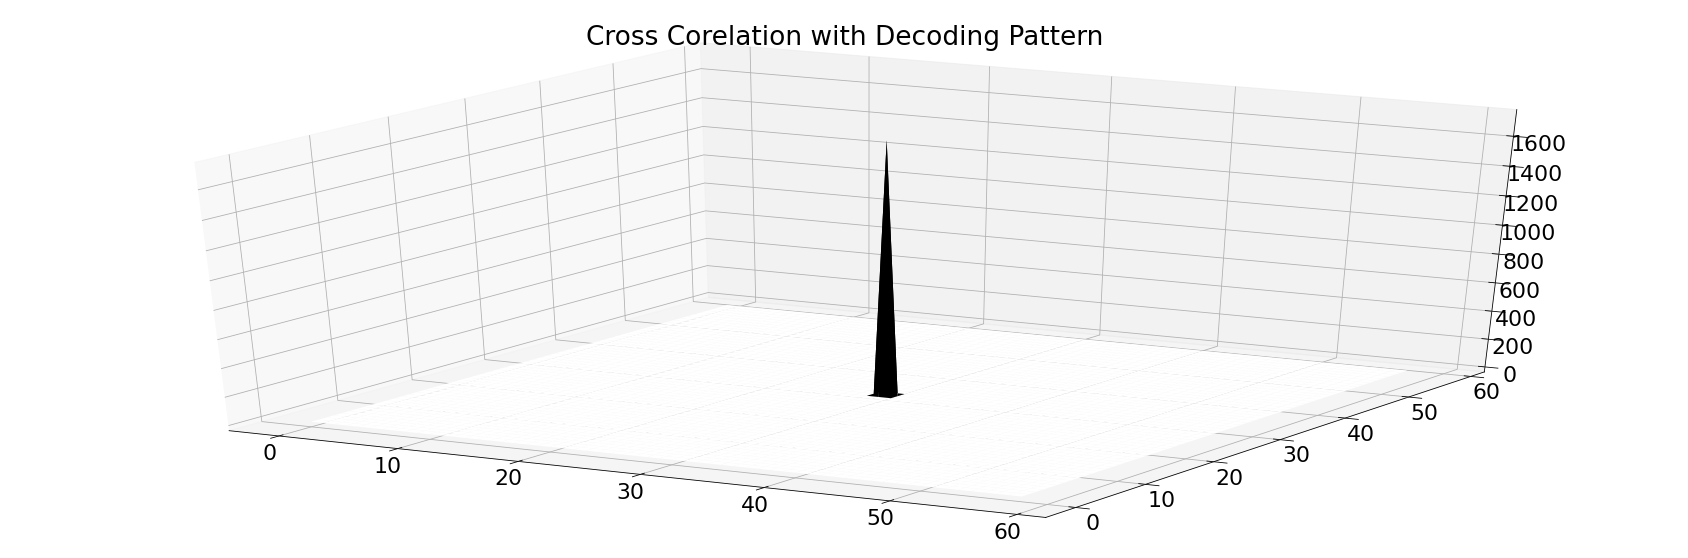

In [ ]:
# Creating our 59x59 element MURA Coding Mask
p=59
qr=qres(p)
t=np.zeros((p,p));
t[1:p,0]=1;
for i in range(1,p):
    for j in range(1,p):
        if qr[i-1]==qr[j-1]:
            t[i,j]=1;
tt=np.vstack((np.hstack((t,t)),np.hstack((t,t))))
ht=2*(t-0.5)
ht[0,0]=1;
cp=signal.convolve2d(ht,t, mode='same',boundary='wrap');

# Plotting Aperture Pattern
plt.subplot(1,2,1)
plt.imshow(t,cmap='gray');
plt.title('Base aperture pattern')
plt.subplot(1,2,2);
plt.imshow(tt, cmap='gray');
plt.title('Tiled aperture pattern')

# Plotting the cross-correlation with the decoding pattern
fig=plt.figure()
ax = plt.gca(projection='3d')
X, Y = np.meshgrid(range(np.shape(cp)[1]), range(np.shape(cp)[0]))
surf = ax.plot_surface(X, Y, cp, rstride=1, cstride=1, antialiased=True, cmap='binary')
plt.title('Cross Corelation with Decoding Pattern')

11501568/11490434 [==============================] - 0s 0us/step


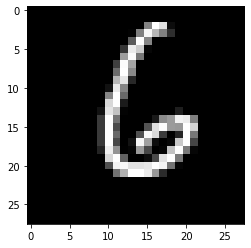

In [4]:
# Loading mnist dataset of characters to use as test images for reconstruction
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0
plt.imshow(x_train[32],cmap='gray')

### A) Reconstruction (no noise)

(-0.5, 58.5, 58.5, -0.5)

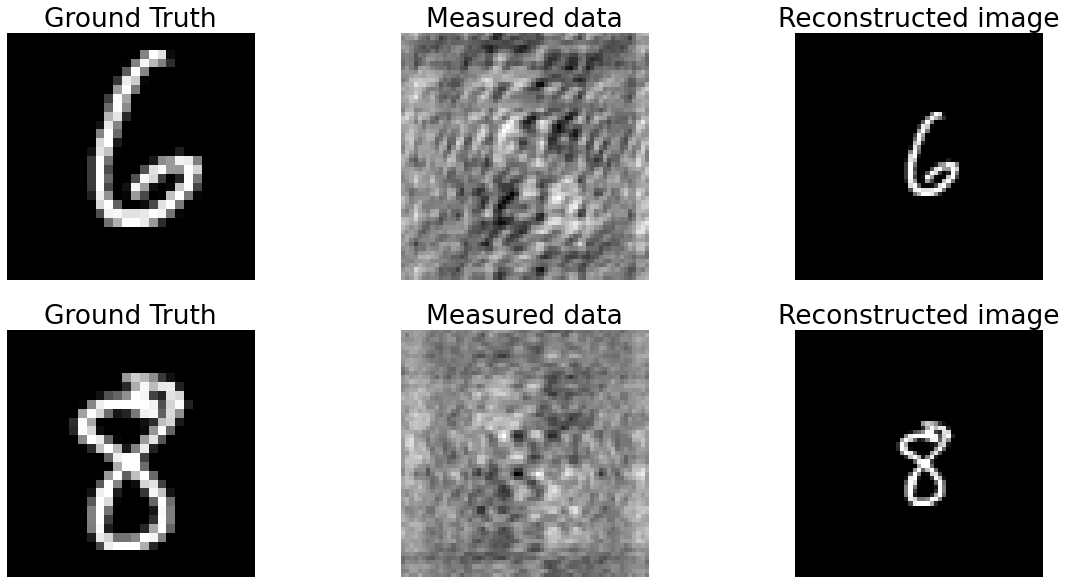

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

# Step 1 generate projected pattern
imagey = x_train[32];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

# Doing the above process again on a second image 
imagey = x_train[46];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

### B) Reconstruction (100 photons per pixel)




(-0.5, 58.5, 58.5, -0.5)

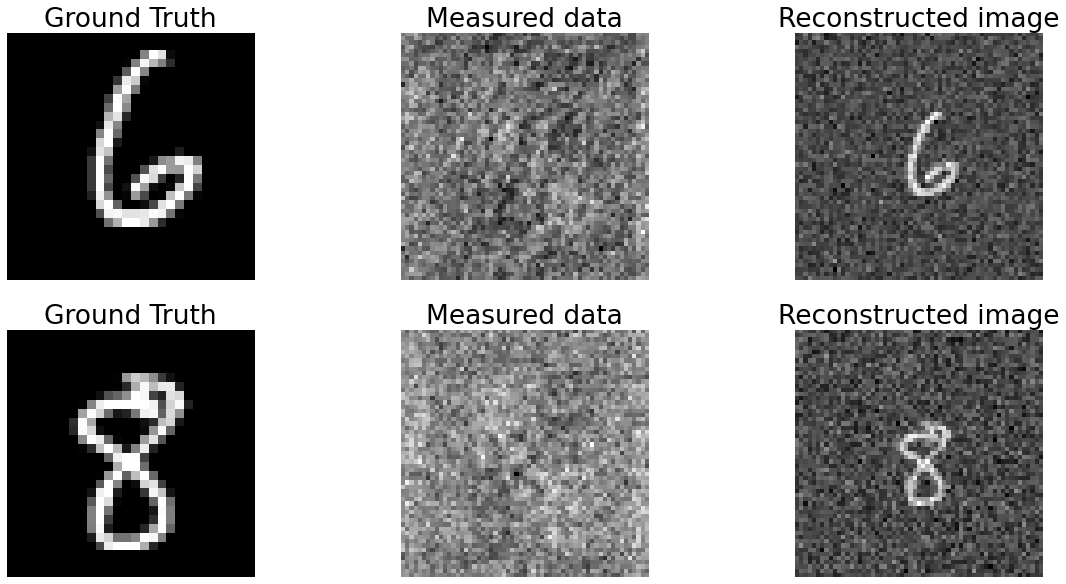

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

# Step 1 generate projected pattern
imagey = x_train[32];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

# Doing the above process again on a second image 
imagey = x_train[46];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

### C) Reconstruction (10 photons per pixel)

(-0.5, 58.5, 58.5, -0.5)

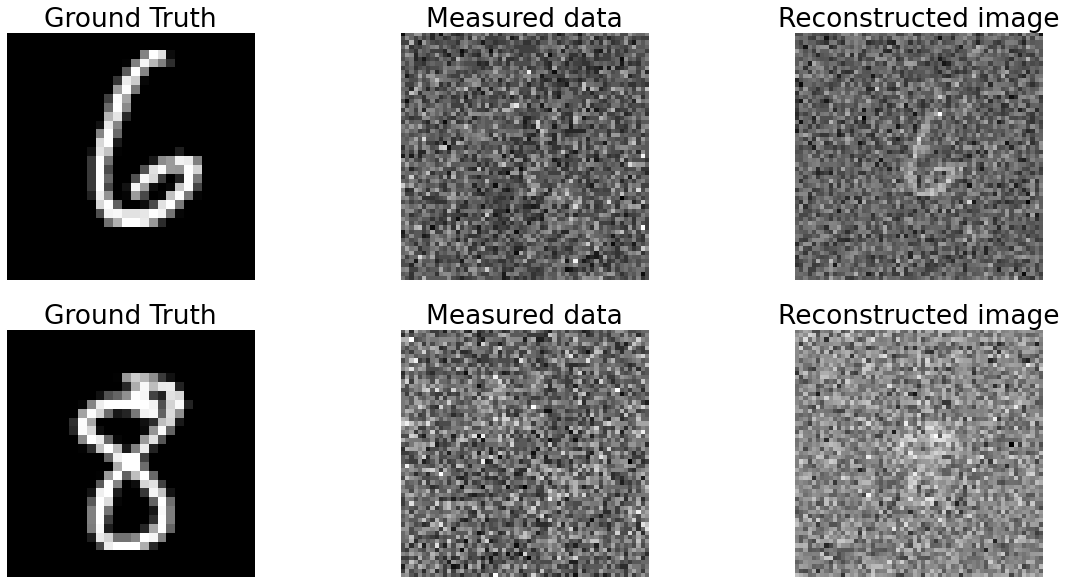

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

# Step 1 generate projected pattern
imagey = x_train[32];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
photonsPerPixel=10
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

# Doing the above process again on a second image 
imagey = x_train[46];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
photonsPerPixel=10
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

### D) Reconstruction (10 photons per pixel with 97x97 element coded aperture)

Text(0.5, 0.92, 'Cross Corelation with Decoding Pattern')

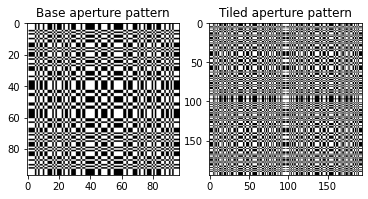

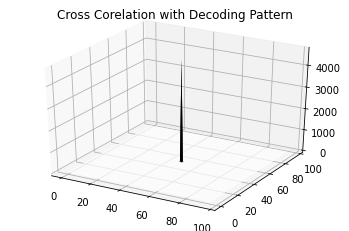

In [5]:
# Attempting aperture with more holes
p=97
qr=qres(p)
t=np.zeros((p,p));
t[1:p,0]=1;
for i in range(1,p):
    for j in range(1,p):
        if qr[i-1]==qr[j-1]:
            t[i,j]=1;
tt=np.vstack((np.hstack((t,t)),np.hstack((t,t))))
ht=2*(t-0.5)
ht[0,0]=1;
cp=signal.convolve2d(ht,t, mode='same',boundary='wrap');

# Plotting Aperture Pattern
plt.subplot(1,2,1)
plt.imshow(t,cmap='gray');
plt.title('Base aperture pattern')
plt.subplot(1,2,2);
plt.imshow(tt, cmap='gray');
plt.title('Tiled aperture pattern')

# Plotting the cross-correlation with the decoding pattern
fig=plt.figure()
ax = plt.gca(projection='3d')
X, Y = np.meshgrid(range(np.shape(cp)[1]), range(np.shape(cp)[0]))
surf = ax.plot_surface(X, Y, cp, rstride=1, cstride=1, antialiased=True, cmap='binary')
plt.title('Cross Corelation with Decoding Pattern')

(-0.5, 96.5, 96.5, -0.5)

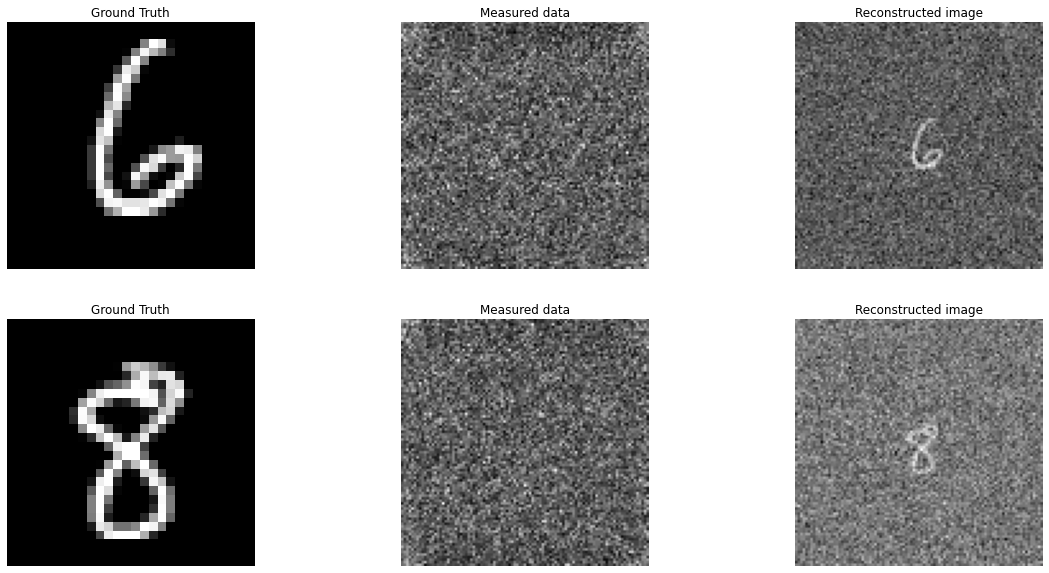

In [6]:
plt.rcParams['figure.figsize'] = [20, 10]

# Step 1 generate projected pattern
imagey = x_train[32];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
photonsPerPixel=10
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

# Doing the above process again on a second image 
imagey = x_train[46];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
photonsPerPixel=10
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

### E) Discussion

This exercise aimed to give a simple demonstration of the basic procedure of coded aperture imaging. We take in a set of data as the object and add in various levels of shot noise (no noise, 10 photons per pixel, and 100 photons per pixel). We then apply the MURA coded aperture and observe the results for each noise level. 

We can see that coded aperture imaging does very well for a noise level of zero. The reconstructed image is almost a perfect reconstruction of the object image.

When a noise level of 100 photons per pixel is introduced, we can really observe the ability of coded aperture imaging. We can see that coded aperture does very well with handling noise. We know that when the target is the dominant feature in a scene, SNR will be increased as the random noise adds a certain level of "extra" signal to better reproduce the original object. 

Even with a noise level of 10 photons per pixel, we still obtain a respectable reconstruction, given that there is a lower signal and thus more difficult to reproduce the object. 

From the SNR equation for coded apertures, we know that an increased number of holes in the aperture will also increase SNR. I implemented this theory for the signal level of 10 photons per pixel. As we can see, this 97x97 element coded aperture produced a much better reconstruction than the 57x57 element aperture, even with such a low signal level. 

## 2) Neural Denoising of Reconstructed Images

In [ ]:
# load the mnist dataset of characters
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train =np.pad(x_train, ((0,0),(14,14),(14,14)), 'constant')
x_test =np.pad(x_test, ((0,0),(14,14),(14,14)), 'constant')
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

print(np.shape(x_test))


11501568/11490434 [==============================] - 0s 0us/step
(10000, 56, 56)


In [ ]:
# Load previous test data to save time
x_train1 = np.load('/content/drive/MyDrive/University of Arizona/x_train1.npy')
x_test1 = np.load('/content/drive/MyDrive/University of Arizona/x_test1.npy')

In [ ]:
# Here we're checking if the loaded data is the same as the data 
# we gathered from mnist above

# if the loaded dad from a previous session is still viable we'll load
# the rest 
if (x_train1.shape[0:3] == x_train.shape) and (x_test1.shape[0:3] == x_test.shape):
  print('Loading data from prior session...')
  g_train1 = np.load('/content/drive/MyDrive/University of Arizona/g_train1.npy')
  g_test1 = np.load('/content/drive/MyDrive/University of Arizona/g_test1.npy')
  print('Data loaded successfully')

# if not, we will recreate the g_test and g_train data and save the new data
else:   
  g_test=np.zeros(np.shape(x_test))
  g_train=np.zeros(np.shape(x_train))

  pbar1 = ProgressBar()
  for pop in pbar1(range(np.shape(x_test)[0])):
    g_test[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_test[pop,:,:], mode='same',boundary='wrap'))\
                                                ,mode='same',boundary='wrap'),dsize=(56,56))
    g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])

  pbar2 = ProgressBar()
  for pop in pbar2(range(np.shape(x_train)[0])):
    g_train[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_train[pop,:,:], mode='same',boundary='wrap'))\
                                                  ,mode='same',boundary='wrap'),dsize=(56,56))
    g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])

  x_train = np.reshape(x_train, (len(x_train), 56,56, 1))
  x_test = np.reshape(x_test, (len(x_test), 56,56, 1))
  g_train = np.reshape(g_train, (len(g_train), 56,56, 1))
  g_test = np.reshape(g_test, (len(g_test), 56,56, 1))

  np.save('x_train1', x_train)
  np.save('x_test1', x_test)
  np.save('g_train1', g_train)
  np.save('g_test1', g_test)

Loading data from prior session...
Data loaded successfully


1.0


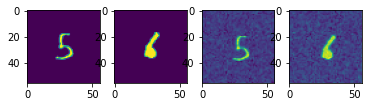

In [ ]:
if (x_train1.shape[0:3] == x_train.shape) and (x_test1.shape[0:3] == x_test.shape):
  x_train = x_train1
  x_test = x_test1
  g_train = g_train1
  g_test = g_test1

plt.subplot(1,4,1)
plt.imshow(x_test[1931].reshape(56,56))
plt.subplot(1,4,2)
plt.imshow(x_train[1931].reshape(56,56))
plt.subplot(1,4,3)
plt.imshow(g_test[1931].reshape(56,56))
plt.subplot(1,4,4)
plt.imshow(g_train[1931].reshape(56,56))
print(np.max(g_test[1931]))

### A) Denoising Model #1

#### Layers

In [ ]:
input_img = keras.Input(shape=(56, 56, 1))
# we add in four extra layers on top of Dr. Brady's example, now 14 epochs

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 56, 56, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0     

#### Training

In [ ]:
autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=14,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)

Epoch 1/14
469/469 [==============================] - 24s 16ms/step - loss: 0.0607 - val_loss: 0.0341
Epoch 2/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0304 - val_loss: 0.0280
Epoch 3/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0270 - val_loss: 0.0256
Epoch 4/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0252 - val_loss: 0.0242
Epoch 5/14
469/469 [==============================] - 7s 15ms/step - loss: 0.0241 - val_loss: 0.0233
Epoch 6/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0233 - val_loss: 0.0226
Epoch 7/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0226 - val_loss: 0.0221
Epoch 8/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0221 - val_loss: 0.0216
Epoch 9/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0217 - val_loss: 0.0213
Epoch 10/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0214 - val_l

#### Results

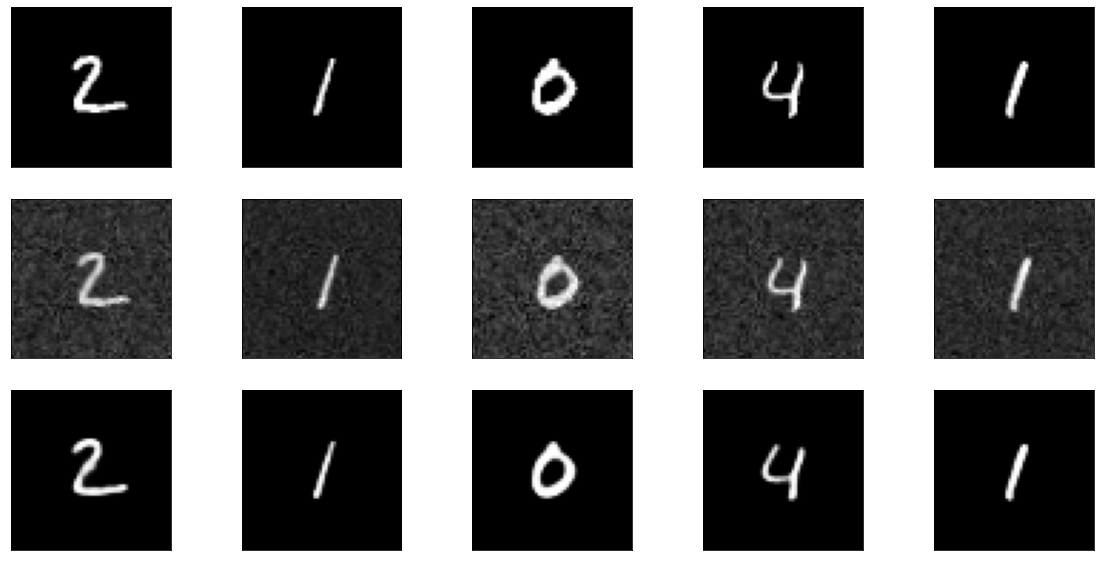

In [ ]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i)
    plt.imshow(g_test[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### B) Denoising Model #2

#### Layers

In [ ]:
# we'll be using the same data as the network above, just changing the # layers
input_img = keras.Input(shape=(56, 56, 1))
# we add in four extra layers on top of Dr. Brady's example, now 14 epochs

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((4, 4), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((4, 4))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 56, 56, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 56, 56, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 32)        0   

#### Training

In [ ]:
autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0764 - val_loss: 0.0405
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0378 - val_loss: 0.0355
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0347 - val_loss: 0.0335
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0333 - val_loss: 0.0327
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0323 - val_loss: 0.0316
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0315 - val_loss: 0.0309
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0308 - val_loss: 0.0304
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0303 - val_loss: 0.0298
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0298 - val_loss: 0.0293
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0295 - val_lo

#### Results

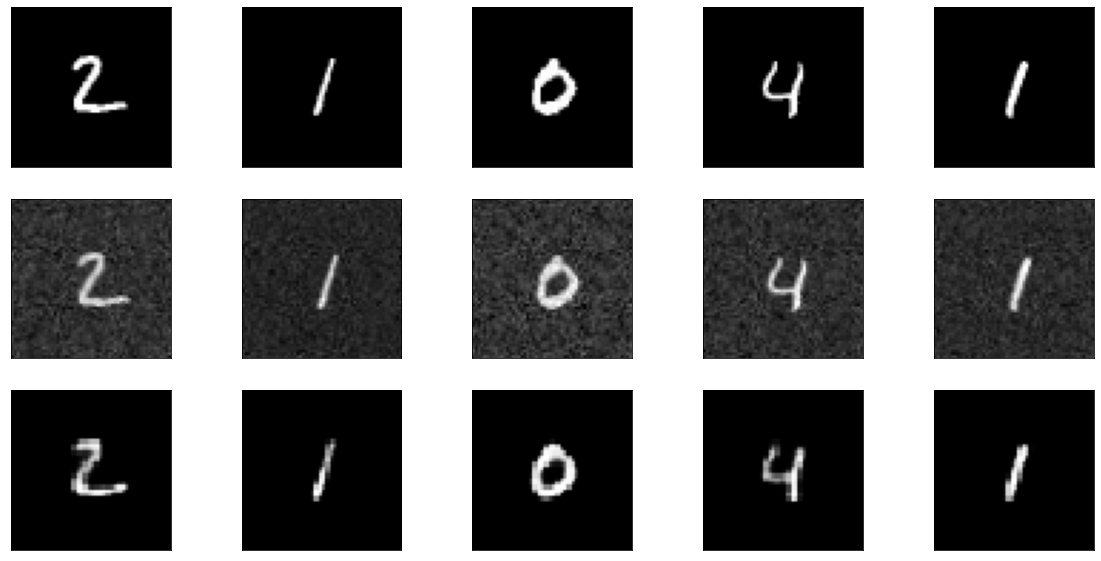

In [ ]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i)
    plt.imshow(g_test[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### C) Discussion

For this exercise, we observe the results of applying a neural denoising algorithm on the previous coded aperture reconstructions. For this, I implemented two different networks, each with a different number of layers (14 layers vs. 10 layers). 

The first network was able to successfully remove all noise from the reconstructed images. '

The second network, having fewer layers, did not perform as well. While it was able to successfully remove the noise from the reconstructions, the final images contain a more distorted reproduction of the original image. It appears that the target feature in the reconstructions prior to undergoing denoising are clearer than the outputs of the neural denoiser. This is more than likely due to the pace of max-pooling and upsampling, as the dimensions were manipulated by a factor of 4 and then 2 (two steps of pooling/upsampling), as opposed to the first network which performed the manipulation with a factor of 2 (three steps of pooling/upsampling). 

The takeaway here, though, is that because the added noise in the coded aperture reconstructions were non-spatially-correlated, the neurqal denoising algorithm was successsfully able to remove it. If it were the opposite, we would have a harder time trying to remove the noise in a way that does nto degrade the final output. 